In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

from tensorflow.keras.layers import GlobalAveragePooling2D

In [19]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

from keras.preprocessing.image import ImageDataGenerator

In [20]:
train_dir = 'Data/mel_train'

test_dir = 'Data/mel_test'

In [21]:
cnn_model_7 = models.load_model('saved_models/cnn_model_7.h5')

In [33]:
cnn_model_7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 dropout_39 (Dropout)        (None, 34, 34, 64)       

In [22]:
train_cnn_history_7 = pd.read_pickle('saved_models/train_cnn_history_7.pkl')

In [23]:
train_cnn_history_7

,loss,accuracy,val_loss,val_accuracy
0,2.534568,0.147219,2.208171,0.234216
1,2.253243,0.205234,2.155692,0.278513
2,2.142717,0.243839,2.086000,0.316701
3,2.078257,0.261287,2.136994,0.262729
4,2.015604,0.270883,1.868832,0.371690
5,1.973651,0.294002,2.031551,0.243890
6,1.924917,0.300545,1.845001,0.365580
7,1.870329,0.323664,1.884578,0.370163
8,1.810957,0.341549,2.116325,0.262729
9,1.741714,0.370774,1.923383,0.330448


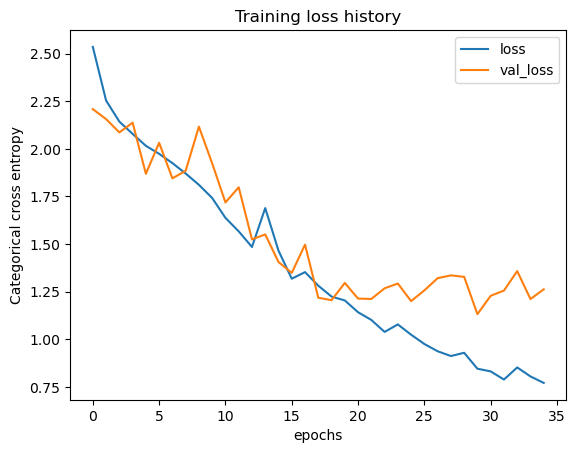

In [24]:
train_cnn_history_7.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history_7[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

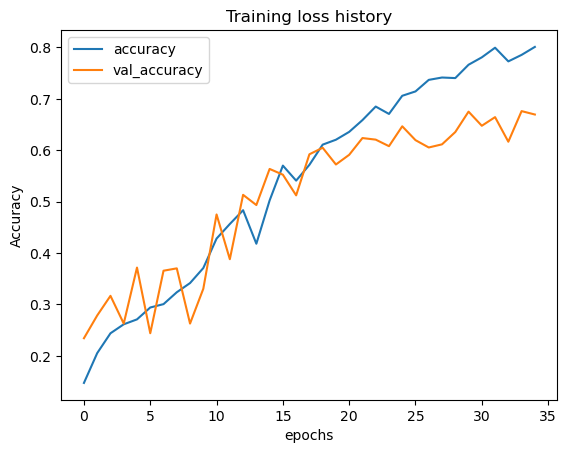

In [25]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history_7[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [26]:
train_data_gen_2 = ImageDataGenerator(rescale = 1./255, validation_split = .3)

train_generator_2 = train_data_gen_2.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

Found 4585 images belonging to 10 classes.


In [27]:
val_data_gen_2 = ImageDataGenerator(rescale=1./255)

validation_generator_2 = train_data_gen_2.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

Found 1964 images belonging to 10 classes.


In [28]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 2183 images belonging to 10 classes.


In [29]:
predictions = cnn_model_7.predict(test_generator)

69/69 [==============================] - 9s 127ms/step


Accuracy: 0.7778286761337608


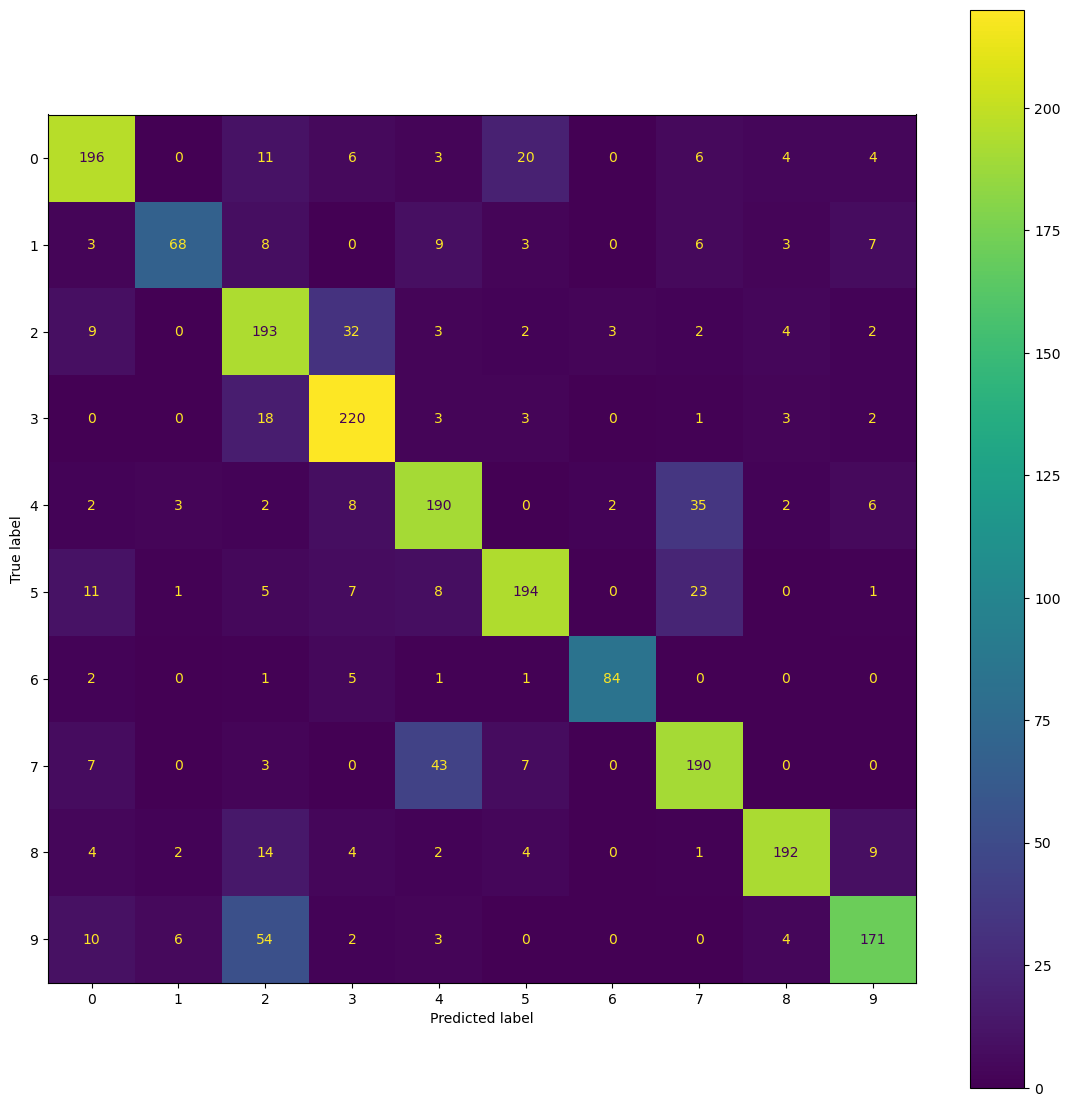

In [30]:
predicted_labels = [np.argmax(pred) for pred in predictions]

true_labels = test_generator.classes

accuracy = np.mean(np.array(predicted_labels) == true_labels)
print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax = ax);


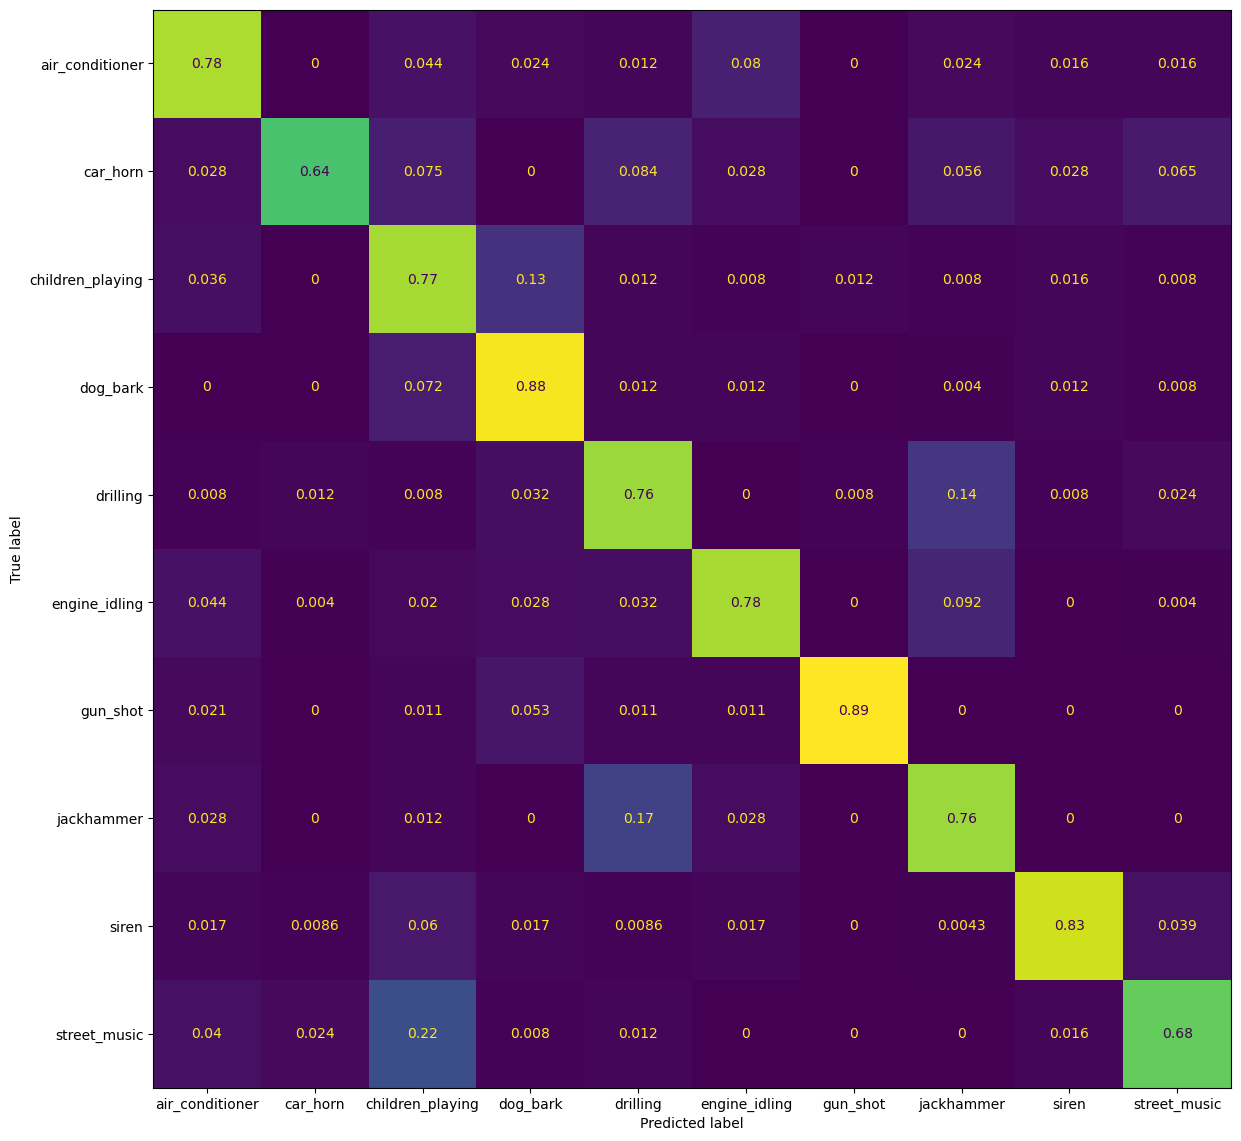

In [31]:
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 
               'gun_shot', 'jackhammer', 'siren', 'street_music']

y_true_labeled = []
y_pred_labeled = []

for label in true_labels:
    y_true_labeled.append(class_labels[label])

for label in predicted_labels:
    y_pred_labeled.append(class_labels[label])
    

fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(y_true_labeled, y_pred_labeled, 
                                        normalize = 'true', colorbar=False, labels = class_labels, ax = ax);

In [32]:
train_data_gen_4 = ImageDataGenerator(rescale = 1./255, validation_split = .35)

train_generator_4 = train_data_gen_4.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

val_data_gen_4 = ImageDataGenerator(rescale=1./255)

validation_generator_4 = train_data_gen_4.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

test_data_gen_4 = ImageDataGenerator(rescale=1./255)

test_generator_4 = test_data_gen_4.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 4262 images belonging to 10 classes.
Found 2287 images belonging to 10 classes.
Found 2183 images belonging to 10 classes.


### Train/Validation of 65/35 Slightly stronger L2 and Dropout, back to Batch size of 32

In [ ]:
model14 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model14.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(8e-4) ))

model14.add(BatchNormalization())
model14.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.

model14.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4) ))
model14.add(BatchNormalization())
model14.add(MaxPooling2D((2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model14.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model14.add(BatchNormalization())
model14.add(Dropout(0.1))

model14.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model14.add(BatchNormalization())
model14.add(Dropout(0.25))

# transition to dense fully-connected part of network
model14.add(Flatten())
model14.add(BatchNormalization())
model14.add(Dense(256, activation='relu'))
model14.add(Dropout(0.25))

model14.add(BatchNormalization())
model14.add(Dense(128, activation='relu'))
model14.add(Dropout(0.3))

model14.add(BatchNormalization())
model14.add(Dense(64, activation='relu'))
model14.add(Dropout(0.7))

model14.add(Dense(10, activation='softmax'))

model14.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_14 = model14.fit(train_generator_4, validation_data = validation_generator_4, epochs = 35, batch_size=32)

In [ ]:
model14.save('saved_models/cnn_model_14.h5')

train_cnn_history_14 = pd.DataFrame(history_cnn_14.history)

train_cnn_history_14.to_pickle("saved_models/train_cnn_history_14.pkl")  

In [15]:
train_data_gen_4 = ImageDataGenerator(rescale = 1./255, validation_split = .3)

train_generator_4 = train_data_gen_4.flow_from_directory(

                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

val_data_gen_4 = ImageDataGenerator(rescale=1./255)

validation_generator_4 = train_data_gen_4.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

test_data_gen_4 = ImageDataGenerator(rescale=1./255)

test_generator_4 = test_data_gen_4.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 4585 images belonging to 10 classes.
Found 1964 images belonging to 10 classes.
Found 2183 images belonging to 10 classes.


## Try same thing with Train/Validation as 85/15 split

In [38]:
model15 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model15.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3)))

model15.add(BatchNormalization())
model15.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.

model15.add(Conv2D(64, (3, 3), activation='relu'))
model15.add(BatchNormalization())
model15.add(MaxPooling2D((2, 2)))

model15.add(Conv2D(64, (3, 3), activation='relu'))
model15.add(BatchNormalization())
model15.add(MaxPooling2D((2, 2)))

# transition to dense fully-connected part of network
model15.add(GlobalAveragePooling2D())

model15.add(Dense(10, activation='softmax'))

model15.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [40]:
history_cnn_15 = model15.fit(train_generator_4, validation_data = validation_generator_4, epochs = 35, batch_size=32)

Epoch 1/35
134/134 [==============================] - 54s 398ms/step - loss: 1.7179 - accuracy: 0.4029 - val_loss: 2.5420 - val_accuracy: 0.1373
Epoch 2/35
134/134 [==============================] - 53s 397ms/step - loss: 1.3393 - accuracy: 0.5530 - val_loss: 3.6712 - val_accuracy: 0.1198
Epoch 3/35
134/134 [==============================] - 54s 401ms/step - loss: 1.0922 - accuracy: 0.6574 - val_loss: 3.8800 - val_accuracy: 0.1705
Epoch 4/35
134/134 [==============================] - 53s 394ms/step - loss: 0.9253 - accuracy: 0.7137 - val_loss: 2.4139 - val_accuracy: 0.2755
Epoch 5/35
134/134 [==============================] - 53s 393ms/step - loss: 0.8009 - accuracy: 0.7626 - val_loss: 2.6020 - val_accuracy: 0.3030
Epoch 6/35
134/134 [==============================] - 53s 393ms/step - loss: 0.6973 - accuracy: 0.7952 - val_loss: 2.0824 - val_accuracy: 0.4447
Epoch 7/35
134/134 [==============================] - 53s 393ms/step - loss: 0.6274 - accuracy: 0.8153 - val_loss: 1.5516 - val_ac

KeyboardInterrupt: 

### Back to 70/30 Split and removed a pre-flatten layer

In [ ]:
train_data_gen_5 = ImageDataGenerator(rescale = 1./255, validation_split = .3)

train_generator_5 = train_data_gen_5.flow_from_directory(

                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

val_data_gen_5 = ImageDataGenerator(rescale=1./255)

validation_generator_5 = train_data_gen_5.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

test_data_gen_5 = ImageDataGenerator(rescale=1./255)

test_generator_5 = test_data_gen_5.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

In [ ]:
model16 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model16.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(8e-4) ))

model16.add(BatchNormalization())
model16.add(MaxPooling2D(pool_size=(2, 2)))
model16.add(Dropout(0.1))

# define 3x3 filter window sizes. Create 64 filters.


model16.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4) ))
model16.add(BatchNormalization())
model16.add(MaxPooling2D((2, 2)))

model16.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model16.add(BatchNormalization())
model16.add(Dropout(0.25))

# transition to dense fully-connected part of network
model16.add(Flatten())
model16.add(BatchNormalization())
model16.add(Dense(256, activation='relu'))
model16.add(Dropout(0.25))

model16.add(BatchNormalization())
model16.add(Dense(128, activation='relu'))
model16.add(Dropout(0.3))

model16.add(BatchNormalization())
model16.add(Dense(64, activation='relu'))
model16.add(Dropout(0.7))

model16.add(Dense(10, activation='softmax'))

model16.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_16 = model16.fit(train_generator_5, validation_data = validation_generator_5, epochs = 35, batch_size=32)

In [ ]:
model16.save('saved_models/cnn_model_16.h5')

train_cnn_history_16 = pd.DataFrame(history_cnn_16.history)

train_cnn_history_16.to_pickle("saved_models/train_cnn_history_16.pkl")  

## 80/20 Split and Stronger Regularization

In [ ]:
train_data_gen_5 = ImageDataGenerator(rescale = 1./255, validation_split = .2)

train_generator_5 = train_data_gen_5.flow_from_directory(

                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

val_data_gen_5 = ImageDataGenerator(rescale=1./255)

validation_generator_5 = train_data_gen_5.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

test_data_gen_5 = ImageDataGenerator(rescale=1./255)

test_generator_5 = test_data_gen_5.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

In [ ]:
model17 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model17.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(8e-4) ))

model17.add(BatchNormalization())
model17.add(MaxPooling2D(pool_size=(2, 2)))
model17.add(Dropout(0.1))

# define 3x3 filter window sizes. Create 64 filters.

model17.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4) ))
model17.add(BatchNormalization())
model17.add(MaxPooling2D((2, 2)))

model17.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model17.add(BatchNormalization())
model17.add(Dropout(0.25))

model17.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model17.add(BatchNormalization())
model17.add(Dropout(0.25))

# transition to dense fully-connected part of network
model17.add(Flatten())
model17.add(BatchNormalization())
model17.add(Dense(256, activation='relu'))
model17.add(Dropout(0.3))

model17.add(BatchNormalization())
model17.add(Dense(128, activation='relu'))
model17.add(Dropout(0.5))

model17.add(BatchNormalization())
model17.add(Dense(64, activation='relu'))
model17.add(Dropout(0.7))

model17.add(Dense(10, activation='softmax'))

model17.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_17 = model17.fit(train_generator_5, validation_data = validation_generator_5, epochs = 35, batch_size=32)

## Same Model, back to 70/30 Split

In [10]:
train_data_gen_6 = ImageDataGenerator(rescale = 1./255, validation_split = .3)

train_generator_6 = train_data_gen_6.flow_from_directory(

                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

val_data_gen_6 = ImageDataGenerator(rescale=1./255)

validation_generator_6 = train_data_gen_6.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

test_data_gen_6 = ImageDataGenerator(rescale=1./255)

test_generator_6 = test_data_gen_6.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 4585 images belonging to 10 classes.
Found 1964 images belonging to 10 classes.
Found 2183 images belonging to 10 classes.


In [11]:
model18 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model18.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(5e-3) ))

model18.add(BatchNormalization())
model18.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.

model18.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3) ))
model18.add(BatchNormalization())
model18.add(MaxPooling2D((2, 2)))
model18.add(Dropout(0.1))

model18.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model18.add(BatchNormalization())
model18.add(Dropout(0.2))

model18.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model18.add(BatchNormalization())
model18.add(Dropout(0.25))

# transition to dense fully-connected part of network
model18.add(Flatten())
model18.add(BatchNormalization())
model18.add(Dense(128, activation='relu'))
model18.add(Dropout(0.3))

model18.add(BatchNormalization())
model18.add(Dense(64, activation='relu'))
model18.add(Dropout(0.6))

model18.add(Dense(10, activation='softmax'))

model18.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [12]:
history_cnn_18 = model18.fit(train_generator_6, validation_data = validation_generator_6, epochs = 35, batch_size=32)

Epoch 1/35
144/144 [==============================] - 71s 488ms/step - loss: 2.9216 - accuracy: 0.3145 - val_loss: 3.8759 - val_accuracy: 0.1660
Epoch 2/35
144/144 [==============================] - 73s 506ms/step - loss: 2.1452 - accuracy: 0.5053 - val_loss: 3.9056 - val_accuracy: 0.2271
Epoch 3/35
144/144 [==============================] - 69s 476ms/step - loss: 1.7241 - accuracy: 0.6157 - val_loss: 2.4092 - val_accuracy: 0.2994
Epoch 4/35
144/144 [==============================] - 72s 500ms/step - loss: 1.4399 - accuracy: 0.6757 - val_loss: 1.9304 - val_accuracy: 0.4537
Epoch 5/35
144/144 [==============================] - 70s 482ms/step - loss: 1.2795 - accuracy: 0.7165 - val_loss: 1.7407 - val_accuracy: 0.5290
Epoch 6/35
144/144 [==============================] - 68s 474ms/step - loss: 1.1062 - accuracy: 0.7520 - val_loss: 2.1173 - val_accuracy: 0.5163
Epoch 7/35
144/144 [==============================] - 68s 469ms/step - loss: 0.9955 - accuracy: 0.7771 - val_loss: 2.0613 - val_ac

KeyboardInterrupt: 

In [ ]:
model18 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model18.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(8e-4) ))

model18.add(BatchNormalization())
model18.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.

model18.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4) ))
model18.add(BatchNormalization())
model18.add(MaxPooling2D((2, 2)))
model18.add(Dropout(0.1))

model18.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4) ))
model18.add(BatchNormalization())
model18.add(MaxPooling2D((2, 2)))
model18.add(Dropout(0.2))

model18.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model18.add(BatchNormalization())
model18.add(MaxPooling2D((2, 2)))
model18.add(Dropout(0.25))

# transition to dense fully-connected part of network
model18.add(Flatten())
model18.add(BatchNormalization())
model18.add(Dense(128, activation='relu'))
model18.add(Dropout(0.3))

model18.add(BatchNormalization())
model18.add(Dense(64, activation='relu'))
model18.add(Dropout(0.7))

model18.add(Dense(10, activation='softmax'))

model18.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])